# Neural Network implementation

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers, metrics, callbacks
import keras.backend as K


## Data loading

In [16]:
#input_data = pd.read_excel('/content/drive/MyDrive/TFG/notebooks/data/prepared/prepared_ICU_Prediction.xlsx')
input_data = pd.read_excel('/content/drive/MyDrive/TFG/implementations/machine_learning_tfg/data/prepared/prepared_ICU_Prediction.xlsx')
ground_truth = input_data['ICU']
sample_data = input_data.drop('ICU', axis=1)
train_data, test_data, train_truth, test_truth = train_test_split(sample_data, ground_truth, test_size=0.2, shuffle=True)

## Functions

In [17]:
def specificity(y_true, y_pred):    
  """ Function that implements specifity metric, its author is https://medium.com/@mostafa.m.ayoub/customize-your-keras-metrics-44ac2e2980bd
  """
  true_negatives = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
  possible_negatives = K.sum(K.round(K.clip(1 - y_true, 0, 1)))
  return true_negatives / (possible_negatives + K.epsilon())



def create_neural_network(layers, optimizer='adam', loss_function='binary_crossentropy', metrics=['accuracy', 'Recall', 'Precision', specificity]):
  """ Create a Keras neural network with the folloging attributes

  Arguments:
    layers: List of layers that will have the NN.Ensure  you pass them in the right oreder e.g: [first layer, ..., n hidden layers,..., lastlayer] 
          becuase they will be added in the same order.
  
    The other arguments are autoexplicatives.

  Returns:
    A Keras neural network model

  """
  model = keras.Sequential()
  for layer in layers:
    model.add(layer)

  model.compile(
    optimizer=optimizer,
    loss=loss_function,
    metrics=metrics
    )
  
  return model



def fit_neural_network(model, train_data, train_truth, batch_size, epochs):
  """ Fit a keras NN with teh given arguments
  
  Returns: A Keras history object.
  """

  early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=2,
    restore_best_weights=True,
  )
  
  history = model.fit(
    train_data, train_truth,
    validation_data=(test_data, test_truth),
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[early_stopping],
    verbose = 0
    )
  
  return history


## Metrics functions

In [18]:
def get_accuracy(history):
  accuracy =  history['val_accuracy'].iloc[-1] *100
  return accuracy

def get_recall(history):
  recall =  history['val_recall'].iloc[-1] *100
  return recall

def get_precision(history):
  precision =  history['val_precision'].iloc[-1] *100
  return precision

def get_specificity(history):
  specificity =  history['val_specificity'].iloc[-1] *100
  return specificity

def get_fbeta_measure(history, beta):
  row = history.iloc[-1]
  precision = row.val_precision
  recall = row.val_recall
  fbeta_score = (beta**2 * precision *recall)/((beta**2 *precision)+recall)
  return fbeta_score

### Show Metrics functions


In [19]:
def show_results(history):
  plot_neural_network_loss(history)
  print_neural_network_metrics(history)

def plot_neural_network_loss(history):
    history_df = pd.DataFrame(history.history)
    history_df.loc[:, ['loss', 'val_loss']].plot()

def print_neural_network_metrics(history):
  history_df = pd.DataFrame(history.history)

  accuracy = get_accuracy(history_df)
  print(f'Accuracy: {accuracy} %')

  recall = get_recall(history_df)
  print(f'Recall: {recall} %')

  precision = get_precision(history_df)
  print(f'Precision: {precision} %')

  specificity = get_specificity(history_df)
  print(f'Specifity: {specificity} %')

  f2_score = get_fbeta_measure(history_df, 2)
  print(f'F2-score {f2_score}')


## Models


Accuracy: 79.63636517524719 %
Recall: 61.538463830947876 %
Precision: 72.72727489471436 %
Specifity: 89.5202100276947 %
F2-score 0.5079365261978454


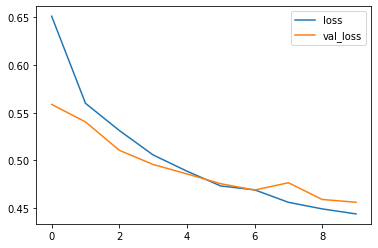

In [20]:

num_features = train_data.shape[1]
neural_network_layers = [
                         layers.Dense(units=64, activation='relu', input_dim=num_features),  
                         layers.Dense(units=1, activation='sigmoid')
                         ]

model = create_neural_network(layers=neural_network_layers)
history = fit_neural_network(model, train_data=train_data, train_truth=train_truth, batch_size=128, epochs=10)

show_results(history)

Accuracy: 79.63636517524719 %
Recall: 52.74725556373596 %
Precision: 78.68852615356445 %
Specifity: 92.56854057312012 %
F2-score 0.4517647278307218


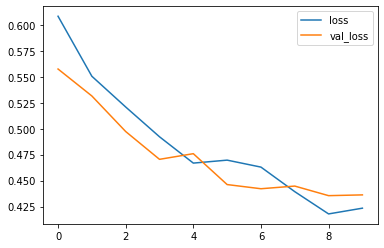

In [21]:
neural_network_layers2 = [
                         layers.Dense(units=64, activation='relu', input_dim=num_features),  
                         layers.Dense(units=64, activation='relu'),  
                         layers.Dense(units=1, activation='sigmoid')
                         ]
        
model2 = create_neural_network(layers=neural_network_layers2)
history2 = fit_neural_network(model2, train_data=train_data, train_truth=train_truth, batch_size=128, epochs=10)

show_results(history2)

Accuracy: 79.27272915840149 %
Recall: 57.14285969734192 %
Precision: 74.28571581840515 %
Specifity: 90.65656661987305 %
F2-score 0.47926269237506397


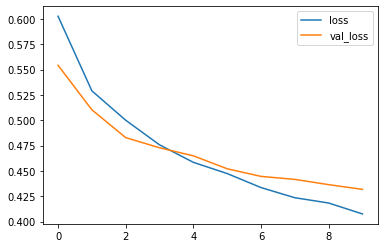

In [22]:
neural_network_layers3 = [
                         layers.Dense(units=128, activation='relu', input_dim=num_features),  
                         layers.Dense(units=1, activation='sigmoid')
                         ]

model3 = create_neural_network(layers=neural_network_layers3)
history3 = fit_neural_network(model3, train_data=train_data, train_truth=train_truth, batch_size=128, epochs=10)

show_results(history3)


Accuracy: 77.4545431137085 %
Recall: 39.56044018268585 %
Precision: 83.72092843055725 %
Specifity: 97.27633595466614 %
F2-score 0.353808357980884


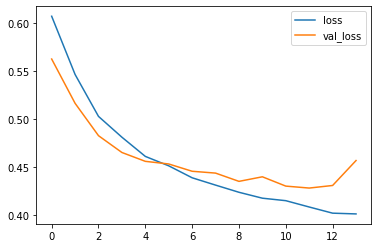

In [24]:
neural_network_layers4 = [
                         layers.Dense(units=64, activation='relu', input_dim=num_features),  
                         layers.Dense(units=1, activation='sigmoid')
                         ]

model4 = create_neural_network(layers=neural_network_layers4)
history4 = fit_neural_network(model4, train_data=train_data, train_truth=train_truth, batch_size=128, epochs=50)

show_results(history4)

Accuracy: 78.18182110786438 %
Recall: 63.736265897750854 %
Precision: 68.23529601097107 %
Specifity: 88.27519416809082 %
F2-score 0.5167038031113665


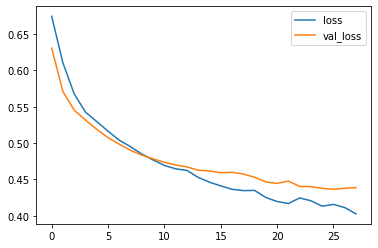

In [25]:
neural_network_layers5 = [
                         layers.Dense(units=64, activation='relu', input_dim=num_features),  
                         layers.Dense(units=1, activation='sigmoid')
                         ]
        

model5 = create_neural_network(layers=neural_network_layers5)

history5 = fit_neural_network(model5, train_data=train_data, train_truth=train_truth, batch_size=256, epochs=50)
show_results(history5)

Accuracy: 77.4545431137085 %
Recall: 46.15384638309479 %
Precision: 76.36363506317139 %
Specifity: 92.9347813129425 %
F2-score 0.40095465477178305


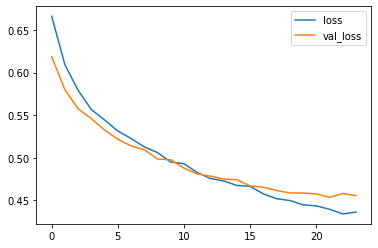

In [26]:
neural_network_layers6 = [
                         layers.Dense(units=64, activation='relu', input_dim=num_features),  
                         layers.Dense(units=1, activation='sigmoid')
                         ]
        

model6 = create_neural_network(layers=neural_network_layers6)

history6 = fit_neural_network(model6, train_data=train_data, train_truth=train_truth, batch_size=512, epochs=50)
show_results(history6)

## Grid search

@see https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/


In [27]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [28]:
def print_grid_search_results(grid_result):
  print(f'El mejore resultado :{grid_result.best_score_} se consigue con {grid_result.best_params_}')


In [29]:
grid_search_data = input_data.sample(frac=0.3)
grid_search_data_truth = grid_search_data['ICU']
grid_search_data_train = grid_search_data.drop('ICU', axis=1)

In [30]:


def grid_model1():
  neural_network_layers = [
                         layers.Dense(units=64, activation='relu', input_dim=num_features),  
                         layers.Dense(units=1, activation='sigmoid')
                         ]
  model = create_neural_network(layers=neural_network_layers)
  return model




grid_model = KerasClassifier(build_fn=grid_model1, verbose=0)

batch_size = [8, 16, 32, 64, 128, 256, 512]
epochs = [1, 2, 4, 8, 16, 32, 64, 128, 256, 384, 512]
param_grid = dict(batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator=grid_model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(grid_search_data_train, grid_search_data_truth)


print_grid_search_results(grid_result)


El mejore resultado :0.8155435721079508 se consigue con {'batch_size': 32, 'epochs': 128}


In [31]:

def grid_model_neurons(neurons=1):
  neural_network_layers = [
                         layers.Dense(units=neurons, activation='relu', input_dim=num_features),  
                         layers.Dense(units=1, activation='sigmoid')
                         ]
  model = create_neural_network(layers=neural_network_layers)
  return model

model_for_neurons = KerasClassifier(build_fn=grid_model_neurons, verbose=0)

neurons = [1, 2, 4, 8, 16, 32, 64, 128, 256]
param_grid = dict(neurons=neurons)

grid = GridSearchCV(estimator=model_for_neurons, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(grid_search_data_train, grid_search_data_truth)

print_grid_search_results(grid_result)

El mejore resultado :0.7377728223800659 se consigue con {'neurons': 256}


Values obtained with grid search:


*   neurons: 128
*   batch size: 16
*   epochs: 256


Accuracy: 80.0000011920929 %
Recall: 52.74725556373596 %
Precision: 80.0000011920929 %
Specifity: 92.188560962677 %
F2-score 0.4528302103917595


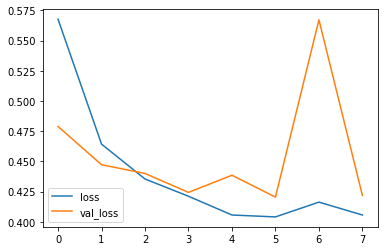

In [32]:
neural_network_layers_grid = [
                         layers.Dense(units=128, activation='relu', input_dim=num_features),  
                         layers.Dense(units=1, activation='sigmoid')
                         ]
        

model_optimized_grid = create_neural_network(layers=neural_network_layers_grid)

history_grid = fit_neural_network(model_optimized_grid, train_data=train_data, train_truth=train_truth, batch_size=16, epochs=256)
show_results(history_grid)